In [17]:
import pandas as pd
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [18]:
# !git clone gttps://github.com/taegojo/data.git

In [19]:
df = pd.read_csv('./data/wine.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


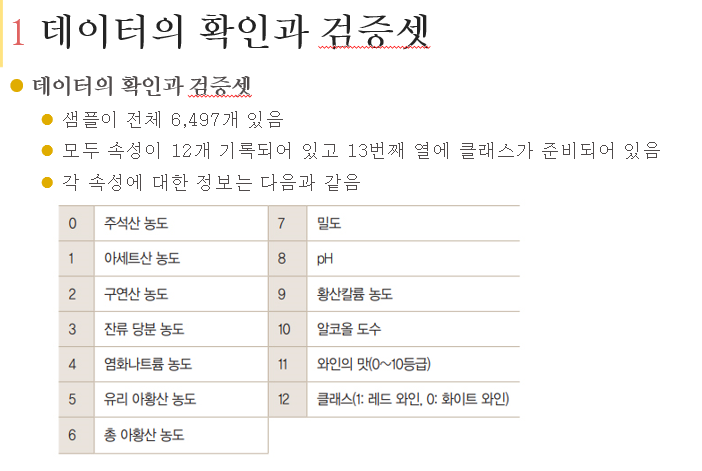

In [20]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

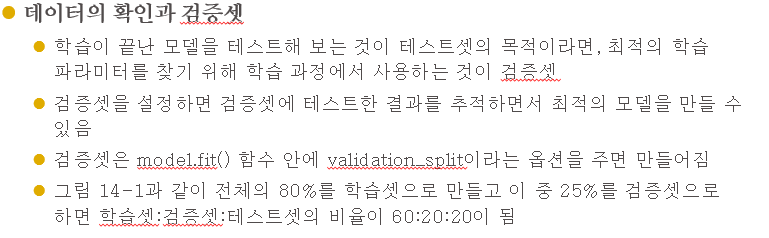

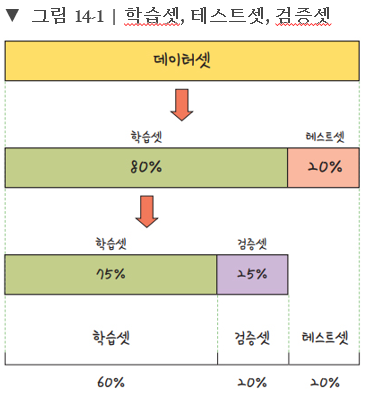

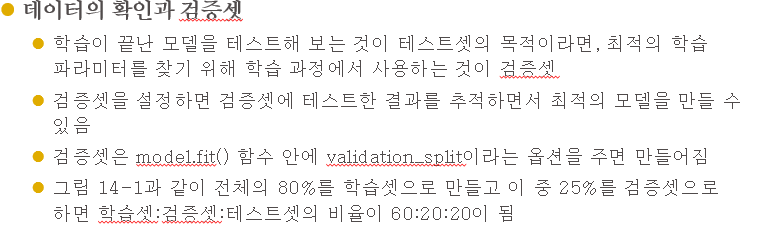

In [22]:
df = pd.read_csv('./data/wine.csv', header=None)
# 0~11번째 열에 해당하는 속성 12rofmf X로, 13번째 열을 y로 정하겠음 
X = df.iloc[:,0:12]
y = df.iloc[:,12]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 0.8 x 0.25 = 0.2
# 검증셋은 model.fit()안에 validation_split 이라는 옵션을 주면 만들어짐. 
history = model.fit(x_train, y_train, epochs=50, batch_size=500,validation_split=0.25)

score = model.evaluate(x_test, y_test)
print('Test accuracy', score[1])



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 1s 18ms/step - loss: 0.7270 - accuracy: 0.6141 - val_loss: 0.3557 - val_accuracy: 0.8215
Epoch 2/50
8/8 [=

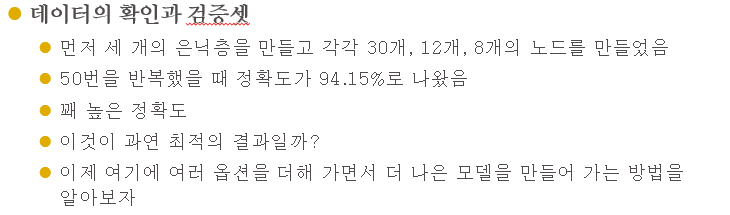

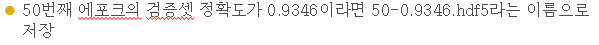

In [24]:
modelpath = './data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5'

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [26]:
# 데이터로드 
df = pd.read_csv('./data/wine.csv', header=None)

# 0~11번째 열에 해당하는 속성 12rofmf X로, 13번째 열을 y로 정하겠음 
X = df.iloc[:,0:12]
y = df.iloc[:,12]

# 테스트 데이터, 학습데이터 분할 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 체크 포인트로 경로지정 - 정확도 이름으로 저장 
modelpath = './data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath=modelpath, verbose=1)

# 세이브 베스트 온니 넣어주면 가장 베스트 정확도만 저장 
# checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_accuracy', save_best_only=True)


# # 폴더 생성
# folder = os.path.dirname(modelpath)
# if not os.path.exists(folder):
#     os.makedirs(folder)

history = model.fit(x_train, y_train, epochs=50, batch_size=500, validation_split=0.25, callbacks=[checkpoint])

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                390       
                                                                 
 dense_13 (Dense)            (None, 12)                372       
                                                                 
 dense_14 (Dense)            (None, 8)                 104       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
1/8 [==>...........................] - ETA: 3s - loss: 7.2023 - accuracy: 0.1740
Epoch 1: saving model to ./data/model/all\01-0.5877.hdf5
8/8 [==

c:\ProgramData\anaconda3\envs\ai2\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: saving model to ./data/model/all\05-0.8369.hdf5
8/8 [==============================] - 0s 7ms/step - loss: 0.3912 - accuracy: 0.8050 - val_loss: 0.4261 - val_accuracy: 0.8369
Epoch 6/50
1/8 [==>...........................] - ETA: 0s - loss: 0.4261 - accuracy: 0.8080
Epoch 6: saving model to ./data/model/all\06-0.8331.hdf5
8/8 [==============================] - 0s 7ms/step - loss: 0.3746 - accuracy: 0.8327 - val_loss: 0.3494 - val_accuracy: 0.8331
Epoch 7/50
1/8 [==>...........................] - ETA: 0s - loss: 0.3445 - accuracy: 0.8200
Epoch 7: saving model to ./data/model/all\07-0.8446.hdf5
8/8 [==============================] - 0s 7ms/step - loss: 0.3331 - accuracy: 0.8276 - val_loss: 0.3385 - val_accuracy: 0.8446
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 0.2798 - accuracy: 0.8580
Epoch 8: saving model to ./data/model/all\08-0.8815.hdf5
8/8 [==============================] - 0s 7ms/step - loss: 0.3068 - accuracy: 0.8509 - val_loss: 0.3113 - val_accu

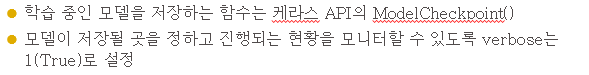

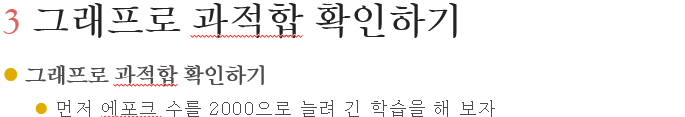

In [27]:
# history = model.fit(x_train, y_train, epochs=2000, batch_size=500,validation_split=0.25)

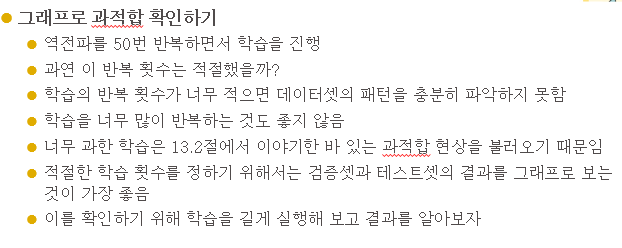

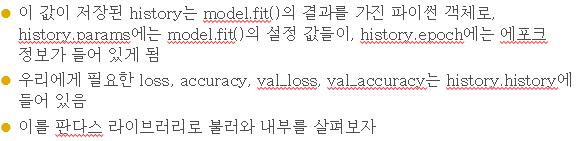

In [28]:
# hist_df = pd.DataFrame(history.history)
# hist_df

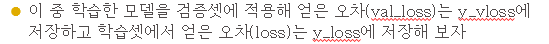

In [29]:
# y_vloss = hist_df['val_loss']
# y_loss = hist_df['loss']

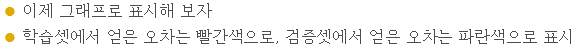

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우

# 마이너스 기호가 깨지지 않도록 설정합니다.
plt.rcParams['axes.unicode_minus'] = False

In [31]:
# x_len = np.arange(len(y_loss))
# plt.plot(x_len, y_vloss, 'o', c="red", markersize=2, label='Testset_오차')
# plt.plot(x_len, y_loss, 'o', c="blue", markersize=2, label='Trainset_오차')

# plt.legend(loc='upper right')
# plt.xlabel('epoch')
# plt.ylabel('오차')
# plt.show()

Epoch 1/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1426 - accuracy: 0.9497 - val_loss: 0.1662 - val_accuracy: 0.9400
Epoch 2/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.1407 - accuracy: 0.9497 - val_loss: 0.1657 - val_accuracy: 0.9385
Epoch 3/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1397 - accuracy: 0.9500 - val_loss: 0.1644 - val_accuracy: 0.9392
Epoch 4/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1391 - accuracy: 0.9502 - val_loss: 0.1652 - val_accuracy: 0.9377
Epoch 5/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1379 - accuracy: 0.9507 - val_loss: 0.1610 - val_accuracy: 0.9415
Epoch 6/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1360 - accuracy: 0.9505 - val_loss: 0.1615 - val_accuracy: 0.9392
Epoch 7/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1361 - accuracy: 0.9502 - val_loss: 0.1583 - val_accuracy: 0.9408
Epoch 8/2000
8/8 [==

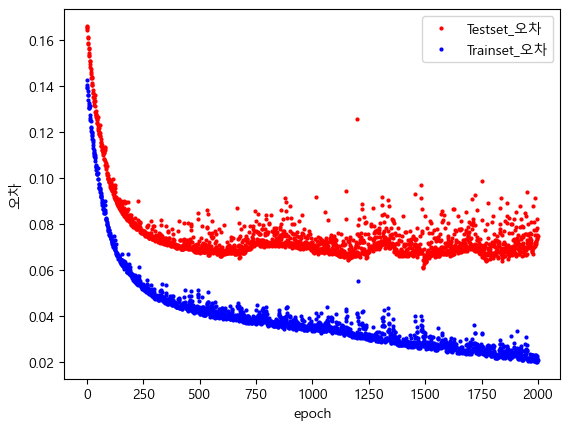

In [32]:
#하나로 통합 
# 그래프 확인을 위한 긴 학습
history = model.fit(x_train, y_train, epochs=2000, batch_size=500,validation_split=0.25)

# history에 저장된 학습 결과를 확인 
hist_df = pd.DataFrame(history.history)
hist_df

# y_vloss에 테스트셋 오차를 저장 
y_vloss = hist_df['val_loss']
# y_loss에 학습셋 오차를 저장 
y_loss = hist_df['loss']

# x 값을 지정하고 테스트셋의 오차를 빨간색, 학습셋의 오차를 파란색으로 표시 
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c="red", markersize=2, label='Testset_오차')
plt.plot(x_len, y_loss, 'o', c="blue", markersize=2, label='Trainset_오차')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('오차')
plt.show()


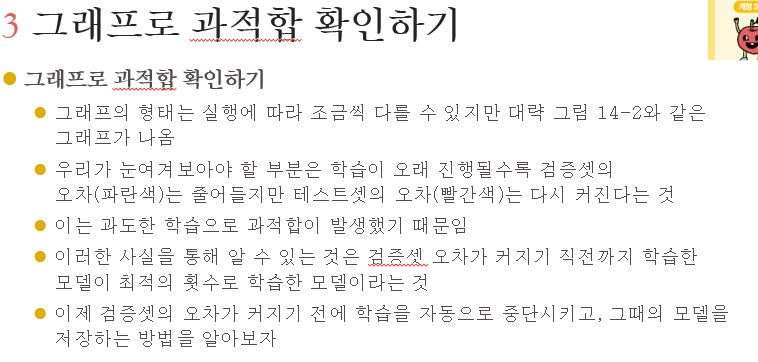

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
# 학습이 언제 자동 중단될지 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=20) 
# monitor='val_loss',patience=20 검증셋의 오차가 20번 이상 낮아지지 않을 경우 학습을 종료하라는 의미

In [35]:
# 최적화된 모델이 저장될 폴더와 모델이름을 정한다. 
modelpath = "./data/model/Ch14-4bestmodel.hdf5"

In [36]:
 # 최적화 모델을 업데이트하고 저장 세이브 베스트 온니라는 옵션을 트루로 설정하여 최적화된 모델 하나만 저장 
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0,save_best_only=True)

In [37]:
# 모델을 실행 - 자동으로 최적화된 모델에서 멈추므로 에포크는 넉넉하게 설정하자. 
history = model.fit(x_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0205 - accuracy: 0.9941 - val_loss: 0.0721 - val_accuracy: 0.9869
Epoch 2/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0227 - accuracy: 0.9923 - val_loss: 0.0717 - val_accuracy: 0.9862
Epoch 3/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0212 - accuracy: 0.9936 - val_loss: 0.0725 - val_accuracy: 0.9862
Epoch 4/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0208 - accuracy: 0.9938 - val_loss: 0.0706 - val_accuracy: 0.9869
Epoch 5/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0103 - accuracy: 0.9960

c:\ProgramData\anaconda3\envs\ai2\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 8ms/step - loss: 0.0217 - accuracy: 0.9926 - val_loss: 0.0702 - val_accuracy: 0.9862
Epoch 6/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0206 - accuracy: 0.9941 - val_loss: 0.0733 - val_accuracy: 0.9869
Epoch 7/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0218 - accuracy: 0.9926 - val_loss: 0.0729 - val_accuracy: 0.9869
Epoch 8/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0760 - val_accuracy: 0.9862
Epoch 9/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0219 - accuracy: 0.9933 - val_loss: 0.0877 - val_accuracy: 0.9823
Epoch 10/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0238 - accuracy: 0.9928 - val_loss: 0.0798 - val_accuracy: 0.9877
Epoch 11/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0253 - accuracy: 0.9908 - val_loss: 0.0813 - val_accuracy: 0.9838
Epoch 12/2000
8/8 [============

In [18]:
# 에포크를 2000번으로 설정했지만 25번에서 멈추었음. 
# 이때의 모델이 model 폴더에 ch14-4-bestmodel.hdf라는 이름으로 저장된 것을 확인 

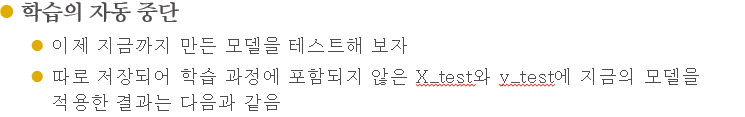

In [38]:
score = model.evaluate(x_test, y_test)
print('Test accuracy:',score[1])

41/41 [==============================] - 0s 939us/step - loss: 0.0283 - accuracy: 0.9923
Test accuracy: 0.9923076629638672


### 정확도가 99.23%
아래 기본소스 정확도를 보면 95.38%로 정확도가 향상되었음을 알수 있다. 

### - 처음의 기본소스 정확도 
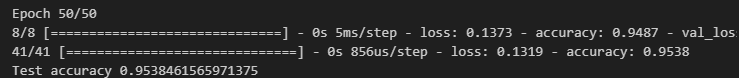
### 95.38%